In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [179]:
df = pd.read_csv('data.csv')

In [180]:
df.duplicated().sum()

0

In [181]:
df.shape

(1303, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed           1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [10]:
df.isnull().sum()

unnamed             0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
df.head()

,unnamed,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype("int32")

In [4]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype("float32")

In [5]:
df.drop(columns='unnamed', inplace=True)

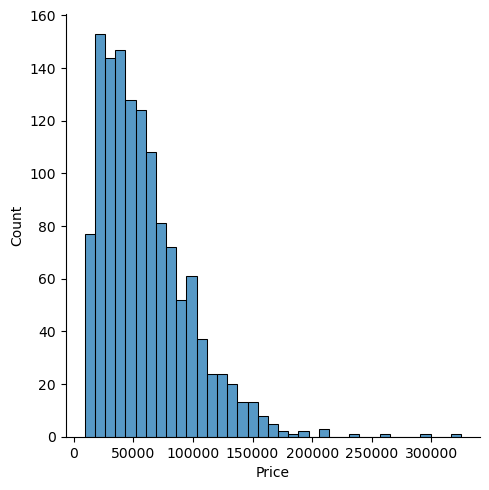

In [15]:
sns.displot(df['Price'])

<Axes: >

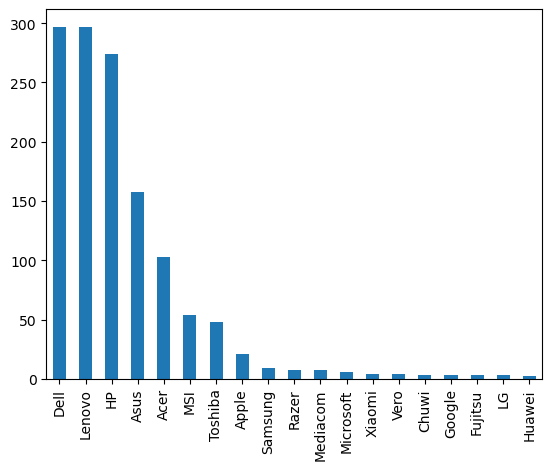

In [49]:
df['Company'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

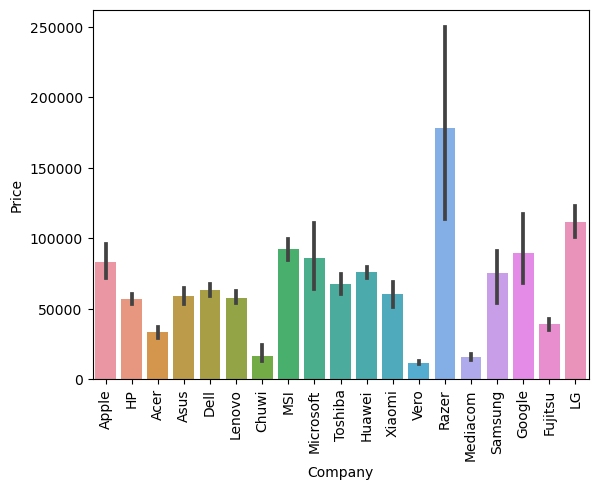

In [61]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=90)

<Axes: >

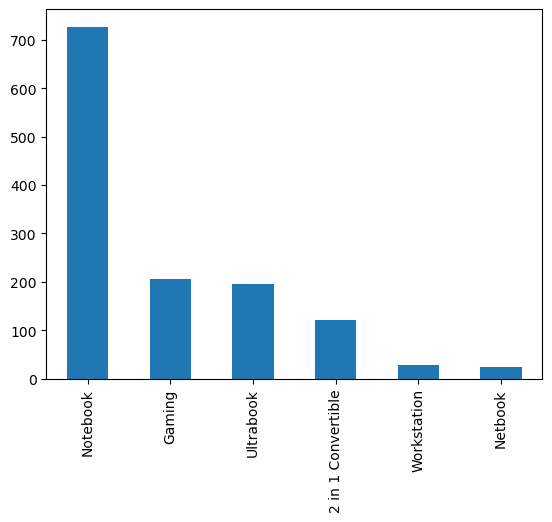

In [63]:
df['TypeName'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

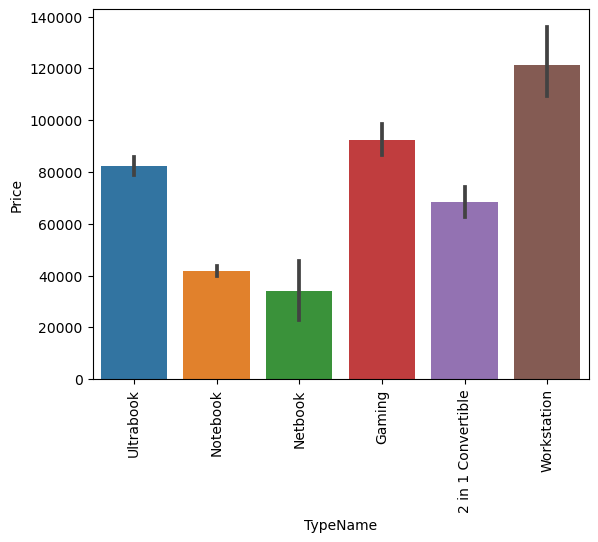

In [65]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=90)

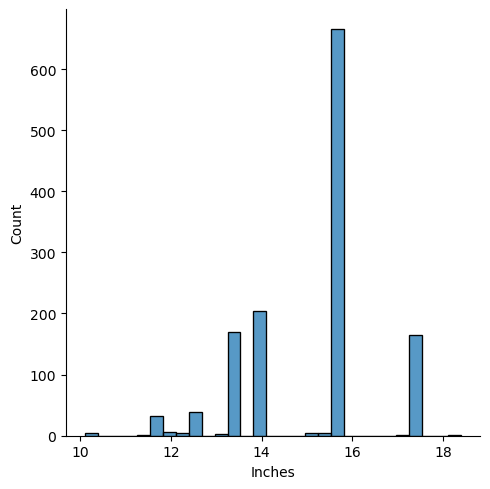

In [67]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

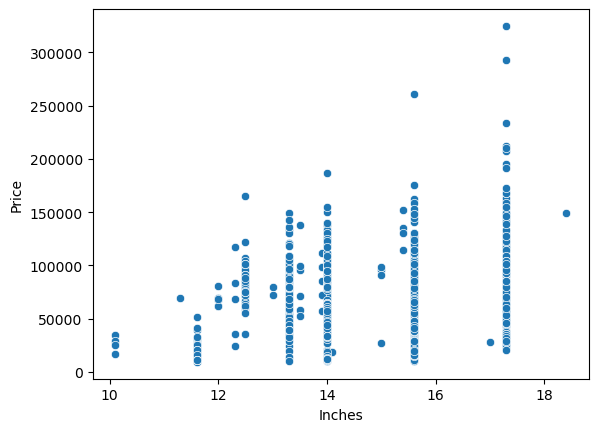

In [70]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [6]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [7]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [8]:
new = df['ScreenResolution'].str.split('x', expand=True)

In [9]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [10]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
379,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,45074.8800,0,0,Full HD 1920,1080
35,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,13266.7200,0,0,1366,768
93,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,63669.6000,0,0,Full HD 1920,1080
552,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,143802.7200,0,1,IPS Panel Full HD 1920,1080
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
482,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49,38681.2800,0,1,IPS Panel Full HD 1920,1080
822,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,133146.7200,0,1,IPS Panel Full HD 1920,1080
199,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,55677.6000,0,0,Full HD 1920,1080
532,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,69210.7200,0,1,IPS Panel 4K Ultra HD 3840,2160
501,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,32979.7872,0,0,1366,768


In [11]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [12]:
df['X_res'] = df['X_res'].astype('int32')

In [13]:
df['Y_res'] = df['Y_res'].astype('int32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [133]:
df.corr()['Price']

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_9480\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [15]:
df['ppi'] = (((df['X_res']**2 + df['Y_res']**2))**0.5 / df['Inches']).astype('float')

In [142]:
df.corr()['Price']

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_9480\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [16]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [17]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [27]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [18]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [19]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [20]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<Axes: >

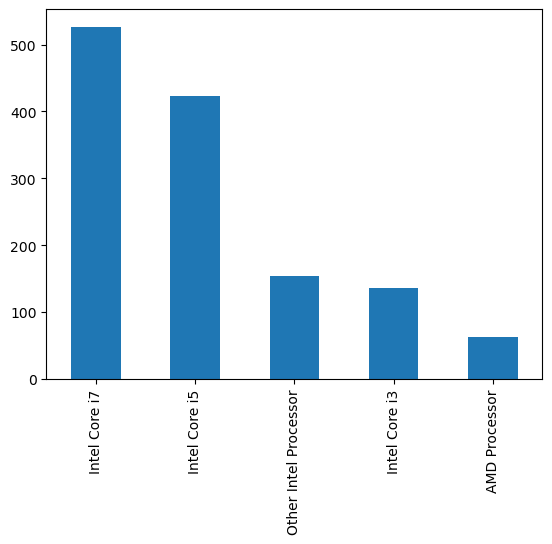

In [31]:
df['Cpu brand'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

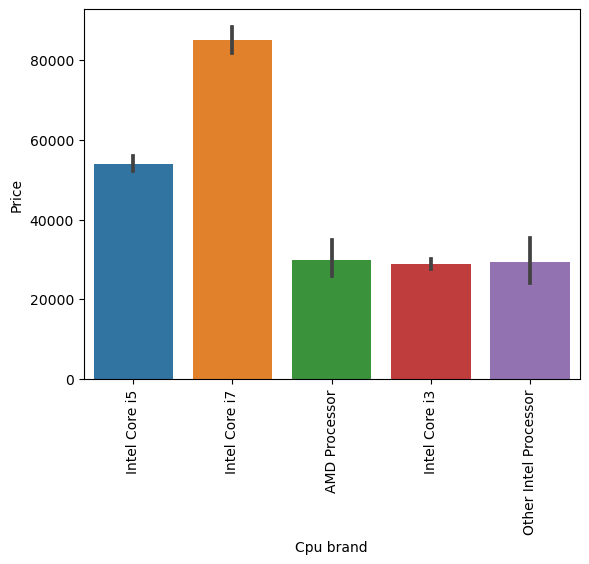

In [168]:
sns.barplot(x = df['Cpu brand'], y = df['Price'])
plt.xticks(rotation=90)


In [21]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace = True)

In [22]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [34]:
df['Memory'] = df['Memory'].str.replace('1.0', '1')

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\1379554861.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory'] = df['Memory'].str.replace('1.0', '1')


In [77]:
df['Memory'] = df['Memory'].str.replace('TB', '000GB')

In [78]:
df.sample(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Flash,Hybrid
1144,HP,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,95850.7200,1,0,220.842824,Intel Core i7,256,0,0,0
750,Lenovo,Netbook,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,25308.0000,1,0,135.094211,Other Intel Processor,128,0,0,0
1140,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,2.80,130003.2000,1,1,209.800683,Intel Core i7,512,0,0,0
1290,Dell,Notebook,6,1000GB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,100.454670,Intel Core i3,0,1,0,0
505,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44,50562.7200,0,0,165.632118,Intel Core i5,256,0,0,0
1260,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,44382.7728,1,0,157.350512,Intel Core i5,128,0,0,0
913,HP,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0,0,141.211998,Intel Core i7,256,0,0,0
1085,HP,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.54,54931.1472,0,0,157.350512,Intel Core i5,0,500GB,0,0
208,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77202.7200,0,0,165.632118,Intel Core i7,256,0,0,0
508,HP,Ultrabook,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.34,70489.4400,0,1,165.632118,Intel Core i7,512,0,0,0


In [79]:
df['SSD'] = df['Memory'].apply(lambda x: x.split('SSD')[0].split('GB')[0] if 'SSD' in x else 0)


df['HDD'] = df['Memory'].apply(lambda x: x.split('HDD')[0].split('TB')[0].split( )[-1] if 'HDD' in x else 0)


df['Flash'] = df['Memory'].apply(lambda x: x.split('Flash')[0].split('GB')[0] if 'Flash' in x else 0)


df['Hybrid'] = df['Memory'].apply(lambda x: x.split('Hybrid')[0].split('GB')[0] if 'Hybrid' in x else 0)

In [91]:
df.sample(20)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,Flash,Hybrid,HDD new
348,Asus,2 in 1 Convertible,4,Intel HD Graphics 500,Windows 10,1.50,19980.0000,1,0,135.094211,Other Intel Processor,0,32,0,0
756,HP,Notebook,8,Nvidia GeForce GTX 1050,Windows 10,2.20,58554.7200,0,1,141.211998,Intel Core i5,128,0,0,1000
357,Dell,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.65,53226.7200,0,0,141.211998,Intel Core i5,0,0,0,1000
33,Dell,Ultrabook,16,Intel UHD Graphics 620,Windows 10,1.20,99580.3200,1,0,276.053530,Intel Core i7,512,0,0,0
54,Acer,Notebook,4,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0,0,100.454670,Intel Core i3,0,0,0,1000
337,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.84,60952.3200,0,0,141.211998,Intel Core i5,256,0,0,0
1291,Acer,Notebook,4,Intel HD Graphics 400,Linux,2.40,15397.9200,0,0,100.454670,Other Intel Processor,0,0,0,500
298,Lenovo,Notebook,6,AMD Radeon R5 430,Windows 10,2.40,26586.7200,0,0,141.211998,AMD Processor,0,0,0,1000
612,Dell,Notebook,4,Intel HD Graphics 520,Linux,2.18,23650.9920,0,0,100.454670,Intel Core i3,0,0,0,1000
85,Dell,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65,71874.7200,0,1,141.211998,Intel Core i7,128,0,0,1000


In [88]:
def convert_gb(value):
    if value == 0:
        return 0
    elif value.endswith('GB'):
        return int(value.replace('GB', ''))
    else:
        return value
df['HDD new'] = df['HDD'].apply(convert_gb)
print(df['HDD new'])

0          0
1          0
2          0
3          0
4          0
        ... 
1298       0
1299       0
1300       0
1301    1000
1302     500
Name: HDD new, Length: 1303, dtype: int64


In [90]:
df.drop(columns=['Memory', 'HDD'], inplace=True)

In [92]:
# SSD	HDD	Flash	Hybrid
df['SSD']=df['SSD'].astype('int64')
df['HDD new']=df['HDD new'].astype('int64')
df['Flash']=df['Flash'].astype('int64')
df['Hybrid']=df['Hybrid'].astype('int64')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   Ips          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  SSD          1303 non-null   int64  
 12  Flash        1303 non-null   int64  
 13  Hybrid       1303 non-null   int64  
 14  HDD new      1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(5)
memory usage: 142.6+ KB


In [94]:
df.corr()['Price']

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
SSD            0.675088
Flash         -0.040511
Hybrid        -0.020186
HDD new       -0.095672
Name: Price, dtype: float64

In [95]:
df.drop(columns=['Hybrid', 'Flash'], inplace=True)

In [96]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [97]:
df = df[df['Gpu brand'] != 'ARM']

In [98]:
df.drop(columns=['Gpu'], inplace=True)

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\3949037655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


In [99]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others / No OS / Linux'

In [100]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [101]:
df.drop(columns=['OpSys'], inplace=True)

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\2632010566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'], inplace=True)


In [102]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD new,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others / No OS / Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


<Axes: xlabel='os', ylabel='Price'>

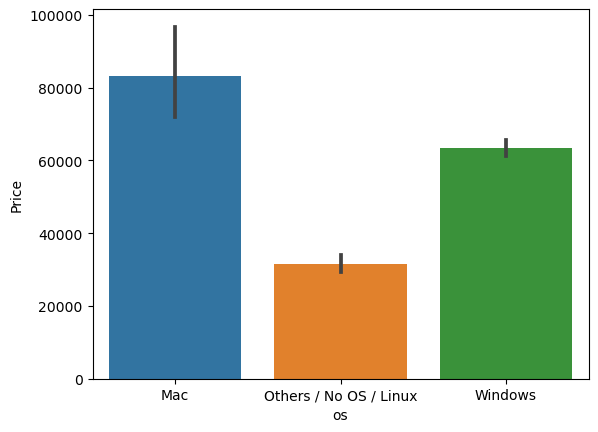

In [103]:
sns.barplot(x=df['os'], y = df['Price'])


In [265]:
dataset.corr()['Price']

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\3781812157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
SSD            0.674951
HDD new       -0.096122
Name: Price, dtype: float64

In [111]:
df.to_csv('Cleaned Laptop Data.csv')

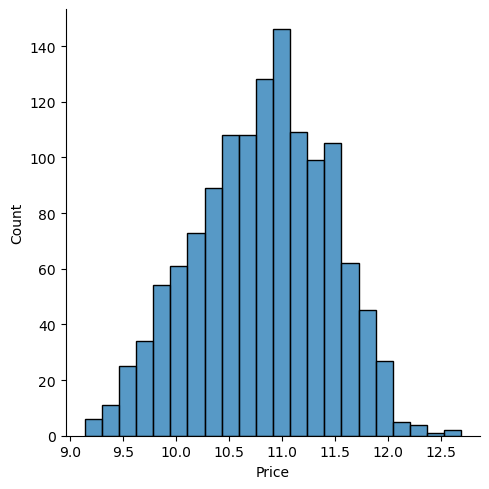

In [167]:
sns.displot(np.log(df['Price']))

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

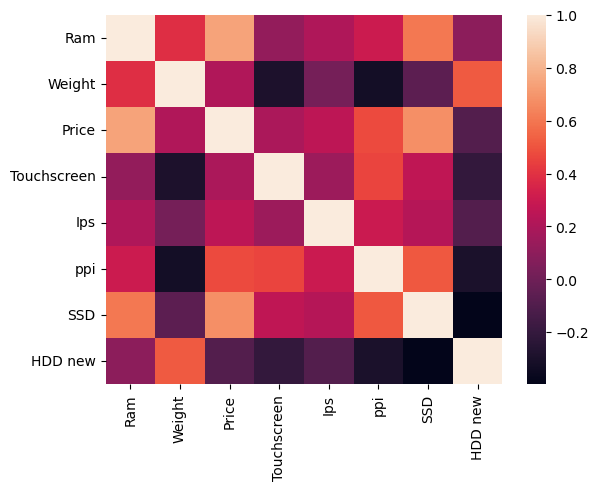

In [263]:
sns.heatmap(dataset.corr())

In [3]:
dataset = pd.read_csv('Cleaned Laptop Data.csv')

In [4]:
X = dataset.drop(columns=['Price'])
y = np.log(dataset['Price'])

In [6]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD new,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others / No OS / Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1299,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,1000,AMD,Windows


In [196]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 5)

In [226]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.0-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.6/99.7 MB 18.2 MB/s eta 0:00:06
   ---------------------------------------- 1.0/99.7 MB 12.1 MB/s eta 0:00:09
   ---------------------------------------- 1.2/99.7 MB 9.8 MB/s eta 0:00:11
    --------------------------------------- 1.5/99.7 MB 8.6 MB/s eta 0:00:12
    --------------------------------------- 1.9/99.7 MB 9.4 MB/s eta 0:00:11
    --------------------------------------- 2.2/99.7 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 2.7/99.7 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 3.1/99.7 MB 9.4 MB/s eta 0:00:11
   - -------------------------------

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

In [11]:
dataset.sample(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD new,Gpu brand,os
1130,HP,Notebook,8,2.04,33513.12,0,0,100.45467,Intel Core i7,0,2000,Intel,Windows


In [12]:
#LINEAR REGRESSION
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8059597092358304
MAE 0.21081590464715344


In [63]:
#Polynomial REGRESSION
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = PolynomialFeatures(degree = 1)
step3 = LinearRegression()

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2),
    ('step3', step3)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8059597092358318
MAE 0.21081590464714955


In [52]:
print(np.exp(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)))

[[ 44910.11792046  35964.        ]
 [ 16164.59915375  11934.72      ]
 [ 23279.49450294  21258.72      ]
 [ 31730.44497483  24634.008     ]
 [ 56104.30625808  95850.72      ]
 [ 89757.56759684  99047.52      ]
 [ 28543.14259313  23922.72      ]
 [ 33191.75276554  29783.52      ]
 [ 69143.76019361  63499.104     ]
 [ 14667.63764727  14492.16      ]
 [ 55532.7471662   99900.        ]
 [ 62052.466017    47365.92      ]
 [125438.66747294  83170.08      ]
 [ 53553.09209425  45664.6896    ]
 [159985.61701345  98834.4       ]
 [ 50682.97003254  47898.72      ]
 [ 43586.88318722  72673.92      ]
 [ 14779.19144694  11135.52      ]
 [ 88162.91353009 111593.8944    ]
 [ 98442.50652283  95850.72      ]
 [118001.5068992  104370.192     ]
 [ 66690.19247197 107305.92      ]
 [ 49790.1716797   42570.72      ]
 [ 80403.51707649  54665.28      ]
 [ 36736.67174754  29783.52      ]
 [129786.50409599  98514.72      ]
 [ 63234.85407968  52054.56      ]
 [ 24960.89831892  18594.72      ]
 [ 53814.95715433  6

In [36]:
#RANDOM FOREST
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=194, 
                             random_state=72, 
                             max_samples=0.8,
                             max_features=0.75,
                             max_depth=18)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.9131315066846774
MAE 0.14366587105231962


In [33]:
print(np.exp(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)))

[[ 73143.68023687  84129.12      ]
 [ 70444.37626034  53168.112     ]
 [ 49793.35448807  37242.72      ]
 [ 21338.60566629  28238.4       ]
 [115814.47971395 110017.872     ]
 [ 21867.7909169   17529.12      ]
 [ 47320.13893052  30849.12      ]
 [ 54785.78702617  99900.        ]
 [ 61249.35954898  53173.44      ]
 [ 54296.60772412  90043.2       ]
 [120283.51832675 158135.04      ]
 [ 52272.3079954   74589.336     ]
 [ 58130.73461775 109170.72      ]
 [ 35420.22855559  27119.52      ]
 [ 22185.06433873  20725.92      ]
 [153199.57227573 167778.72      ]
 [ 87849.27728432 154458.72      ]
 [ 65018.13641694  60472.8       ]
 [ 45519.64439549  36816.48      ]
 [ 63523.76906195  62231.04      ]
 [ 31180.45095465  29250.72      ]
 [152236.0762645  149184.        ]
 [ 94134.34316808  75604.32      ]
 [ 19392.18164305  15930.72      ]
 [ 52320.76345472  46886.4       ]
 [ 98256.40020021  67559.04      ]
 [ 94134.34316808  80908.344     ]
 [ 23776.13971441  11135.52      ]
 [112476.81861696 14

In [27]:
#Lasso Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8212886202503862
MAE 0.21547587114394753


In [31]:
#Ridge Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = Ridge(alpha = 9)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8113151605766714
MAE 0.20990655789006463


In [32]:
#KNN Regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8080638076559381
MAE 0.19102503446521304


In [33]:
#Decision Tree
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8283295269473665
MAE 0.18879180232460166


In [34]:
#SVM 
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = SVR(kernel = 'rbf', C = 10000, epsilon = 0.1)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8180890968843797
MAE 0.19926832848609774


In [57]:
#Extra Trees
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = ExtraTreesRegressor(n_estimators=100, 
                           random_state=3, 
                           max_samples = None, 
                           max_features = 0.75, 
                           max_depth=15)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8749414343297388
MAE 0.16135665599307047


In [58]:
print(np.exp(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)))

[[ 42359.95381126  35964.        ]
 [ 17220.32276119  11934.72      ]
 [ 16706.62432778  21258.72      ]
 [ 24925.77852436  24634.008     ]
 [ 91518.36765059  95850.72      ]
 [ 92338.24299413  99047.52      ]
 [ 22589.00989529  23922.72      ]
 [ 44542.26119038  29783.52      ]
 [ 66100.9279153   63499.104     ]
 [ 17176.73457673  14492.16      ]
 [ 59634.00927729  99900.        ]
 [ 45880.4222601   47365.92      ]
 [ 94123.03071229  83170.08      ]
 [ 56312.54802552  45664.6896    ]
 [108096.68029671  98834.4       ]
 [ 58269.09742507  47898.72      ]
 [ 63630.26169758  72673.92      ]
 [ 17398.36864042  11135.52      ]
 [ 96429.9113225  111593.8944    ]
 [104168.55719616  95850.72      ]
 [107995.11075471 104370.192     ]
 [ 84128.93609375 107305.92      ]
 [ 41347.5137057   42570.72      ]
 [ 64878.3688831   54665.28      ]
 [ 28276.60593329  29783.52      ]
 [105315.36156158  98514.72      ]
 [ 65225.82393117  52054.56      ]
 [ 18800.06815648  18594.72      ]
 [ 59501.04027151  6

In [59]:
#Adaboost
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = AdaBoostRegressor(learning_rate = 1.0, n_estimators=15)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.7964814359140313
MAE 0.2301124920389313


In [ ]:
dataset.head()

In [11]:
# scores = []
# for i in range(1, 10):    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = i)
#     step1 = ColumnTransformer(transformers=[
#     ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
#     ], remainder = 'passthrough')

#     step2 = GradientBoostingRegressor(n_estimators=550)

#     pipe = Pipeline([
#         ('step1', step1), 
#         ('step2', step2)
#     ])
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
#     scores.append(r2_score(y_test, y_pred))

#Gradient Boost
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=320)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8982934042384446
MAE 0.16751671334479307


In [38]:
#XGBoost
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

step2 = XGBRegressor(n_estimators = 52, max_depth = 5, learning_rate =0.5)

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8718137890773306
MAE 0.16621925705282597


In [61]:
#Voting Regressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

rf = RandomForestRegressor(n_estimators=350, 
                             random_state=3, 
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=10)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
lr = LinearRegression()
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=None, max_features=0.75, max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights = [5, 1, 1, 1])

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8846586105045415
MAE 0.1619714989855274


In [62]:
print(np.exp(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)))

[[ 44857.4907561   35964.        ]
 [ 17049.73437062  11934.72      ]
 [ 19663.11152371  21258.72      ]
 [ 26072.22307693  24634.008     ]
 [ 75832.38608492  95850.72      ]
 [ 99882.94693148  99047.52      ]
 [ 25388.27376741  23922.72      ]
 [ 40248.30709907  29783.52      ]
 [ 62962.82098771  63499.104     ]
 [ 16929.37353519  14492.16      ]
 [ 62950.63923726  99900.        ]
 [ 54418.03930339  47365.92      ]
 [100512.47088644  83170.08      ]
 [ 56477.68901196  45664.6896    ]
 [101752.12256875  98834.4       ]
 [ 62580.01169728  47898.72      ]
 [ 52381.17018693  72673.92      ]
 [ 16879.53441787  11135.52      ]
 [ 96639.58701422 111593.8944    ]
 [ 97793.09366813  95850.72      ]
 [ 90410.24363415 104370.192     ]
 [ 79526.65121832 107305.92      ]
 [ 38732.17043506  42570.72      ]
 [ 63703.64241386  54665.28      ]
 [ 30403.74729299  29783.52      ]
 [100368.90713579  98514.72      ]
 [ 58959.38258546  52054.56      ]
 [ 22585.18705958  18594.72      ]
 [ 58877.04944398  6

In [40]:
#Stacking
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

estimators = [
    ("rf", RandomForestRegressor(n_estimators=350, random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)), 
    ("gbdt", GradientBoostingRegressor(n_estimators=100, max_features=0.5)), 
    ("xgb", XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha = 100))

pipe = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 Score 0.8780744315253198
MAE 0.1676568112514064


In [159]:
np.exp(0.21)

1.2336780599567432

In [129]:
##Exporting the Model using PICKLE 
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   SSD          1302 non-null   int64  
 10  HDD new      1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [259]:
dataset.corr()["Price"]

C:\Users\sandesh.toshniwal\AppData\Local\Temp\ipykernel_11412\308662737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()["Price"]


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
SSD            0.674951
HDD new       -0.096122
Name: Price, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

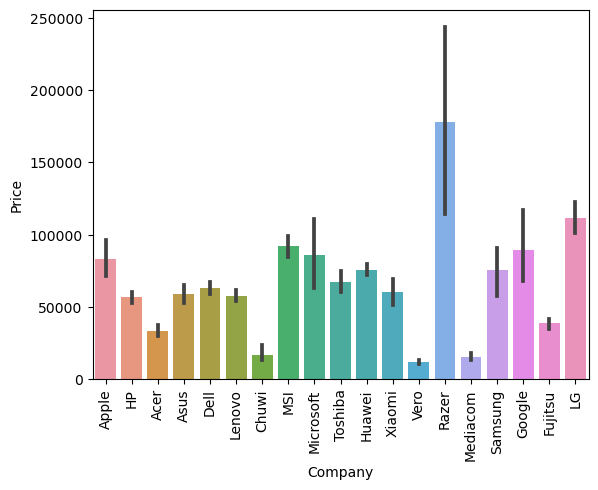

In [256]:
sns.barplot(x=df['Company'], y = df['Price'])
plt.xticks(rotation=90)

In [1]:
dataset.head()

NameError: name 'dataset' is not defined